In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn import svm
from itertools import cycle
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from random import choice
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import validation_curve
from pylab import *  
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  
from collections import Counter
from sklearn.calibration import CalibratedClassifierCV
from scipy import interp
%matplotlib inline

In [3]:
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
train_data=np.load("D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 2/data_hw2/train_data.npy")
train_label=np.load("D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 2/data_hw2/train_label.npy")
test_data=np.load("D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 2/data_hw2/test_data.npy")
test_label=np.load("D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 2/data_hw2/test_label.npy")

##原来的标签是{-1,0,1}，现在变为三堆样本标签，正样本是0，负样本是1

In [5]:
train_label_0=np.where(train_label == 0, 0, 1)
train_label_1=np.where(train_label == 1, 0, 1)
train_label_negative1=np.where(train_label == -1, 0, 1)

test_label_0=np.where(test_label == 0, 0, 1)
test_label_1=np.where(test_label == 1, 0, 1)
test_label_negative1=np.where(test_label == -1, 0, 1)

test_pred=[]
train_pred=[]
test_pred_proba=[]
train_pred_proba=[]

In [6]:
svc_0=CalibratedClassifierCV(svm.LinearSVC(C=2e-7)) 
svc_1=CalibratedClassifierCV(svm.LinearSVC(C=2e-7)) 
svc_negative1=CalibratedClassifierCV(svm.LinearSVC(C=2e-7)) 

svc_0.fit(train_data, train_label_0)
svc_1.fit(train_data, train_label_1)
svc_negative1.fit(train_data, train_label_negative1)

CalibratedClassifierCV(base_estimator=LinearSVC(C=2e-07, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=3, method='sigmoid')

In [7]:
test_pred_0 = svc_0.predict_proba(test_data)[:,0]
test_pred_1 = svc_1.predict_proba(test_data)[:,0]
test_pred_negative1 = svc_negative1.predict_proba(test_data)[:,0]
for i in range(13588):
    maxone=max(test_pred_0[i],test_pred_1[i],test_pred_negative1[i])
    test_pred_proba.append(maxone)
    if maxone == test_pred_0[i]:
        test_pred.append(0)
    elif maxone == test_pred_1[i]:
        test_pred.append(1)
    elif maxone == test_pred_negative1[i]:
        test_pred.append(-1)

In [8]:
train_pred_0 = svc_0.predict_proba(train_data)[:,0]
train_pred_1 = svc_1.predict_proba(train_data)[:,0]
train_pred_negative1 = svc_negative1.predict_proba(train_data)[:,0]
for i in range(37367):
    maxone=max(train_pred_0[i],train_pred_1[i],train_pred_negative1[i])
    train_pred_proba.append(maxone)
    if maxone == train_pred_0[i]:
        train_pred.append(0)
    elif maxone == train_pred_1[i]:
        train_pred.append(1)
    elif maxone == train_pred_negative1[i]:
        train_pred.append(-1)

In [9]:
print(accuracy_score(test_label, test_pred))

0.581836914925


In [10]:
print(accuracy_score(train_label, train_pred))

0.603045467926


In [11]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(train_label, train_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.63      0.47      0.54     12320
    class 1       0.54      0.59      0.56     12144
    class 2       0.64      0.74      0.69     12903

avg / total       0.61      0.60      0.60     37367



In [12]:
print(classification_report(test_label, test_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.68      0.14      0.23      4480
    class 1       0.54      0.74      0.62      4416
    class 2       0.61      0.86      0.71      4692

avg / total       0.61      0.58      0.52     13588



In [13]:
test_label_roc=np.concatenate((test_label_0,test_label_1,test_label_negative1)) 
test_pred_roc=np.concatenate((test_pred_0,test_pred_1,test_pred_negative1)) 

In [14]:
#画ROC曲线和计算AUC  
fpr_0, tpr_0, thresholds_0 = roc_curve(test_label_0, test_pred_0,pos_label=0)#
roc_auc_0 = auc(fpr_0, tpr_0)    
fpr_1, tpr_1, thresholds_1 = roc_curve(test_label_1, test_pred_1,pos_label=0)#
roc_auc_1 = auc(fpr_1, tpr_1)  
fpr_negative1, tpr_negative1, thresholds_negative1 = roc_curve(test_label_negative1, test_pred_negative1,pos_label=0)#
roc_auc_negative1 = auc(fpr_negative1, tpr_negative1)  
fpr_m, tpr_m, thresholds_m = roc_curve(test_label_roc, test_pred_roc,pos_label=0)
roc_auc_m = auc(fpr_m, tpr_m)

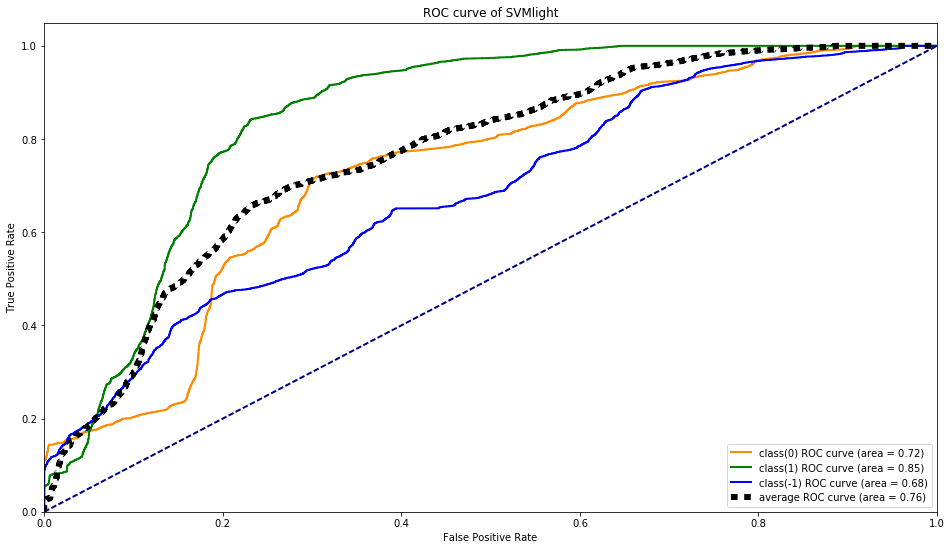

In [17]:
plt.figure()
lw = 2
plt.plot(fpr_0, tpr_0, color='darkorange',
         lw=lw, label='class(0) ROC curve (area = %0.2f)' % roc_auc_0)
plt.plot(fpr_1, tpr_1, color='green',
         lw=lw, label='class(1) ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot(fpr_negative1, tpr_negative1, color='blue',
         lw=lw, label='class(-1) ROC curve (area = %0.2f)' % roc_auc_negative1)
plt.plot(fpr_m, tpr_m, color='black',linestyle=':',
         lw=6, label='average ROC curve (area = %0.2f)' % roc_auc_m)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of SVMlight')
plt.legend(loc="lower right")
plt.savefig('roc svm.png')
plt.show()

##
绘制交叉验证曲线

In [15]:
param_range = [2e-8,5e-8,7e-8,1e-7,3e-7,5e-7,7e-7,1e-6]
train_scores, test_scores = validation_curve(
    svm.LinearSVC(), 
    train_data, train_label, 
    param_name="C", 
    param_range=param_range,
    cv=3, 
    scoring="accuracy", n_jobs=-2)

In [16]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

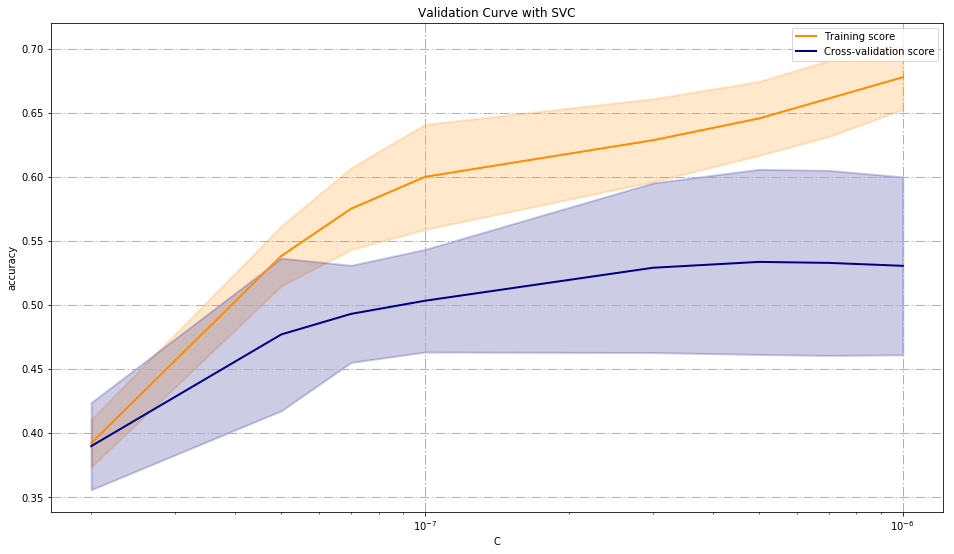

In [17]:
plt.title("Validation Curve with SVC")
plt.xlabel("C")
plt.ylabel("accuracy")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid(True, linestyle = "-.",  linewidth = "1") 
plt.savefig('testplot.png')
plt.show()